### This project applies the practice of Gradient Descent For Multiple Linear Regression

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduces display precision on numpy arrays

<a name="toc_15456_1.3"></a>
## Notation
Here is a summary of some of the notation you will encounter, updated for multiple features.  

a                - scalar, non bold<br>
**a**            - vector, bold<br>
**A**            - matrix, bold<br>

<a name="toc_15456_1.3"></a>
## Problem Statement

The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  

$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}

In [2]:
X_train = np.array([ [2104,5,1,45], [1416,3,2,40], [852,2,1,35] ])
y_train = np.array([460,232,178])

## Parameter vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  

**Near optimal values are selected**

In [3]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

<a name="toc_15456_3"></a>
# Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

## Single Prediction, Element By Element

In [4]:
def predict_single_loop(x, w, b):

    m = x.shape[0]
    f = 0
    for i in range(m):
        f_i = x[i] * w[i]
        f += f_i
    f += b
    return (f)

In [5]:
x_vec = X_train[0, :]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


## Single Prediction, vector
- uses np.dot()

In [6]:
def predict(x, w, b):
    f = np.dot(x,w) + b
    return (f)

In [7]:
x_vec = X_train[0, :]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


<a name="toc_15456_4"></a>
# Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 

In [8]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    f_wb = 0
    for i in range(m):
        f_wb_i = (np.dot(x[i],w) + b) - y[i]
        f_wb += f_wb_i ** 2
    f_wb /= (2 * m)
    return (f_wb)

In [9]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


# Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$

In [10]:
def compute_gradient(x, y, w, b):

    m,n = x.shape
    dw_j = np.zeros((n,))
    db_j = 0.
    for i in range(m):
        err = (np.dot(x[i],w) + b) - y[i]
        for j in range(n):
            dw_j[j] += err * x[i,j]
        db_j += err
    dw_j = dw_j / m
    db_j = db_j / m

    return db_j, dw_j

to understand gradient descent further, the cell above is like the hardware, the cell below is the face of the algorithm

In [11]:

def gradient_descent(x, y, w_in, b_in, cost_func, gradient_func, alpha, num_iters):
    # An array to store cost J and w's at each iteration primarly for graphing
    J_hist = []
    w = copy.deepcopy(w_in) # Just to avoid modifying global W within the function
    b = b_in

    for i in range(num_iters):
        dj_db,dj_dw = gradient_func(x,y,w,b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000: # Just to stay safe and avoid resource exhaustion
            J_hist.append( cost_func(x,y,w,b) )

        # Printing
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_hist[-1]:8.2f}   ")

        return w,b,J_hist

In [12]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 5.0e-7

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                            compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m = X_train.shape[0]
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
b,w found by gradient descent: 0.00,[2.41e-01 5.59e-04 1.84e-04 6.03e-03] 
prediction: 508.04, target value: 460
prediction: 341.97, target value: 232
prediction: 205.83, target value: 178


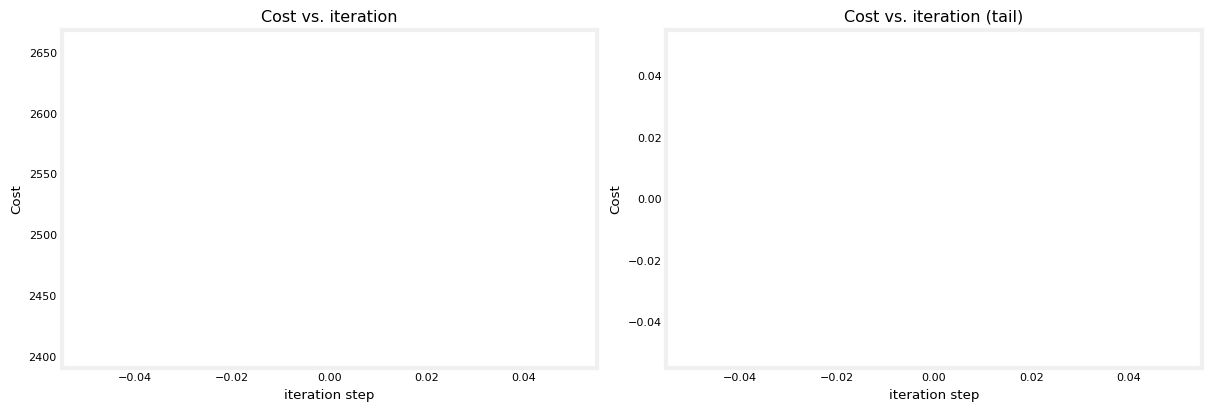

In [13]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()